In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import examproject.exam_2019 as exam

In [396]:
import numpy as np
from scipy import optimize

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import sympy as sm
from scipy import interpolate


# 1. Human capital accumulation

A worker is living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_{1}& = & \begin{cases}
w h_1 & 
\text{if }l_1 = 1  \\
b & \text{if }l_1 = 0 
\end{cases} \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [375]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [376]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:**

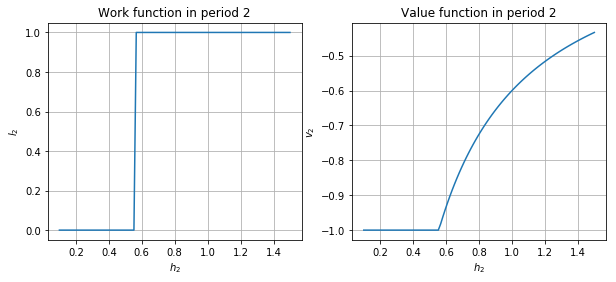

In [379]:
# We solve and illustrate for period 2:
v2_vec,l2_vec = exam.solve_period_2(w,rho,b,gamma,h_vec)


**Question 2:**

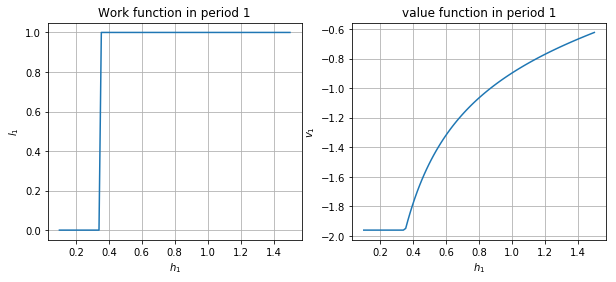

In [381]:
v2_interp = exam.v2_interp(h_vec,v2_vec)

# We solve for period 1
v1_vec,l1_vec = exam.solve_period_1(w,b,rho,gamma,beta,Delta,v2_interp,h_vec)



**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

**Answer to question 3:**

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [299]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Answer to question 1:**

In [300]:
sm.init_printing(use_unicode=True) # for pretty printing

# The parameters
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')

# current periods
v_t = sm.symbols('v_t')
s_t = sm.symbols('s_t')
pi_t = sm.symbols('\pi_t')
y_t = sm.symbols('y_t')

# Past time (pt) periods
y_pt = sm.symbols('y_pt')
pi_pt = sm.symbols('pi_pt')
s_pt = sm.symbols('s_pt')



In [301]:
# AD-curve:
ad = sm.Eq(pi_t,1/(h*alpha)*(v_t-(1+alpha*b)*y_t))
display(ad)

# SRAS-curve:
sras = sm.Eq(pi_t, pi_pt + gamma*y_t - phi*gamma*y_pt + s_t - phi*s_pt)
display(sras)

y in equilibrium is equal to:


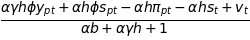

In [302]:
# We solve to isolate y in the equalibrium

pi_ad = 1/(h*alpha)*(v_t-(1+alpha*b)*y_t)
pi_sras = pi_pt + gamma*y_t - phi*gamma*y_pt + s_t - phi*s_pt

equal = sm.Eq(pi_ad, pi_sras)

# y_t equals in equalibrium
print('y in equilibrium is equal to:')
y_equal = sm.solve(equal,y_t)[0]
y_equal


Pi in equilibrium is equal to:


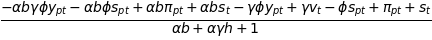

In [303]:
# We solve the AD-equation for y_t
y_ad = sm.solve(ad, y_t)[0]

#And the SRAS-curve for y_t
y_sras = sm.solve(sras, y_t)[0]

# We find pi in equilibrium:
equal = sm.Eq(y_ad, y_sras)
pi_equal = sm.solve(equal,pi_t)[0]
print('Pi in equilibrium is equal to:')
pi_equal

**Answer to question 2:**

In [304]:
# We 'lambdify' the result for y and pi in equilibrium so we can parameterize the equations:
sol_func_y = sm.lambdify((alpha,h,b,phi,gamma,pi_pt,y_pt,s_pt,v_t,s_t),y_equal)
sol_func_pi = sm.lambdify((alpha,h,b,phi,gamma,pi_pt,y_pt,s_pt,v_t,s_t),pi_equal)

display(sol_func_y)
display(sol_func_pi)

<function _lambdifygenerated(alpha, h, b, phi, gamma, pi_pt, y_pt, s_pt, v_t, s_t)>

<function _lambdifygenerated(alpha, h, b, phi, gamma, pi_pt, y_pt, s_pt, v_t, s_t)>

In [305]:
# Variable values
var = {}

var['pi_pt'] = 0
var['y_pt']  = 0
var['s_pt']  = 0 
var['v_t']   = 0
var['s_t']   = 0

y_res = sol_func_y(**par,**var)
pi_res = sol_func_pi(**par,**var)
print(f'The equilibrium with pi_pt=y_pt=s_pt=v_t=s_t=0 is equal to: (y*,pi*)=({y_res:.4f},{pi_res:.4f})')

# We see how the result changes when we introduce a shock:
var['v_t'] = 0.1

y_res = sol_func_y(**par,**var)
pi_res = sol_func_pi(**par,**var)
print(f'The equilibrium with the shock is equal to: (y*,pi*)=({y_res:.4f},{pi_res:.4f})')


The equilibrium with pi_pt=y_pt=s_pt=v_t=s_t=0 is equal to: (y*,pi*)=(0.0000,0.0000)
The equilibrium with the shock is equal to: (y*,pi*)=(0.0244,0.0018)


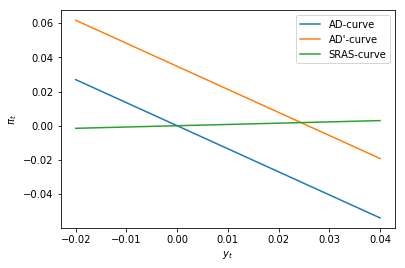

In [306]:
# We illustrate in a figure the equilibrium:
var['v_t']   = 0
var['v_shock']   = 0.1

equilibrium = exam.fig_equilibrium(**par,**var)

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [307]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Answer to question 3:**

In [308]:
delta = sm.symbols('delta')
omega = sm.symbols('omega')

x_t = sm.symbols('x_t')
c_t = sm.symbols('c_t')

v_pt = sm.symbols('v_t-1')
s_pt = sm.symbols('s_t-1')

# Persistent shocks:
v_pers = delta*v_pt + x_t
s_pers = omega*s_pt + c_t

# AD-curve:
ad = sm.Eq(pi_t,1/(h*alpha)*(v_pers-(1+alpha*b)*y_t))
display(ad)

# SRAS-curve:
sras = sm.Eq(pi_t, pi_pt + gamma*y_t - phi*gamma*y_pt + s_pers - phi*s_pt)
display(sras)

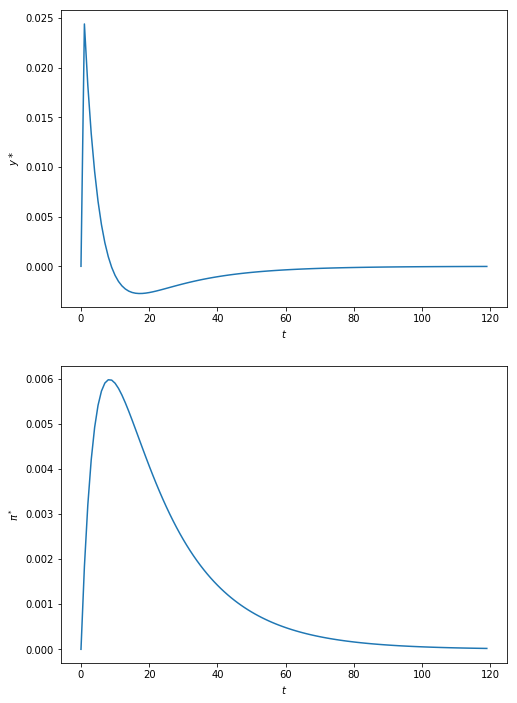

In [309]:
# Dict of initial values
init_val = {}

init_val['y_neg1']  = 0
init_val['pi_neg1'] = 0   
init_val['s_neg1']  = 0
init_val['v_neg1']  = 0

# Shock:
init_val['x0'] = 0.1

T = 120

exam.persistent_disturbance(T,sol_func_y,sol_func_pi,**par,**init_val)

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [310]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Answer to question 4:**

In [311]:
if 'x0' in init_val:
    del init_val['x0']

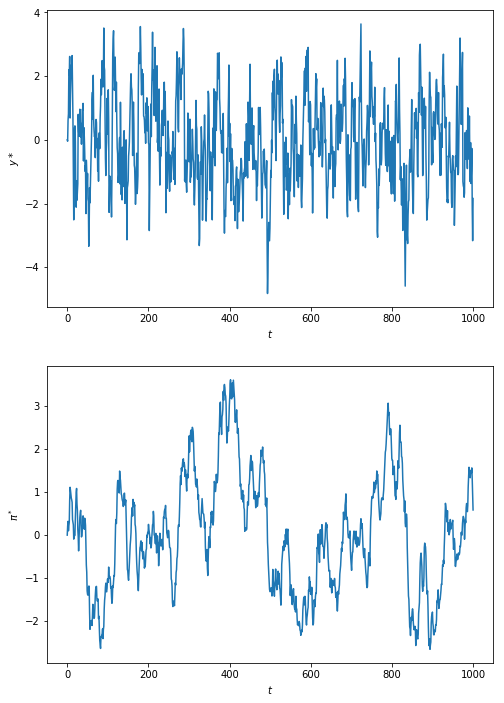

In [312]:
T    = 1000
seed = 1986
AR_process = exam.stochastic_shocks(T,seed,sol_func_y,sol_func_pi,**par,**init_val)

exam.fig_stochastic_shocks(AR_process)

In [313]:
y_arrey  = AR_process[0]
pi_arrey = AR_process[1]

var_y  = np.var(y_arrey)
var_pi = np.var(pi_arrey)
corr   = np.corrcoef(y_arrey,pi_arrey)

autocorr_y  = np.corrcoef(y_arrey[1:],y_arrey[:-1])
autocorr_pi = np.corrcoef(pi_arrey[1:],pi_arrey[:-1])

print(f'1. The variance of y_t                      ,          var(y_t) =  {var_y:.4f}')
print(f'2. The variance of pi_t                     ,         var(pi_t) =  {var_pi:.4f}')
print(f'3. The correlation between y_t and pi_t     ,    corr(y_t,pi_t) = {corr[0,1]:.4f}')
print(f'4. Auto-correlation between y_t and y_t-1   ,   corr(y_t,y_t-1) =  {autocorr_y[0,1]:.4f}')
print(f'5. Auto-correlation between pi_t and pi_t-1 , corr(pi_t,pi_t-1) =  {autocorr_pi[0,1]:.4f}')

1. The variance of y_t                      ,          var(y_t) =  1.9933
2. The variance of pi_t                     ,         var(pi_t) =  1.7972
3. The correlation between y_t and pi_t     ,    corr(y_t,pi_t) = -0.1499
4. Auto-correlation between y_t and y_t-1   ,   corr(y_t,y_t-1) =  0.7807
5. Auto-correlation between pi_t and pi_t-1 , corr(pi_t,pi_t-1) =  0.9869


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Answer to question 5:**

In [294]:
exam.characteristics(T,seed,sol_func_y,sol_func_pi,**par,**init_val)

In [314]:
if 'phi' in par:
    del par['phi']

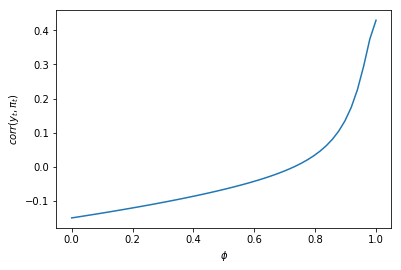

In [315]:
# Plot:
corr_31 = 0.31

exam.plot_corr_phi(T,seed,sol_func_y,sol_func_pi,**par,**init_val)


In [316]:
if 'phi' in par:
    del par['phi']
corr_goal = 0.31

# We ...
result = exam.optimize_phi(corr_goal,T,seed,sol_func_y,sol_func_pi,**par,**init_val)
print(f'The .... phi = {result.x:.3f}')

# We test the value
par['phi'] = result.x
test = exam.corr_of_phi(T,seed,sol_func_y,sol_func_pi,**par,**init_val)

print(f'corr(y_t, pi_t) = {test:.3f}')

The .... phi = 0.963
corr(y_t, pi_t) = 0.310


**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

**Answer to question 6:**

In [330]:
# List of characteristics
char = {}

char['var_y']       = 1.64
char['var_pi']      = 0.21
char['corr_y_pi']   = 0.31
char['autocorr_y']  = 0.84
char['autocorr_pi'] = 0.48

for i in {'phi','sigma_x','sigma_c'}:
    if i in par:
        del par[i]
        
result = exam.optimize_all_char(T,seed,sol_func_y,sol_func_pi,**par,**init_val,**char)
parameters = result.x

par['phi'] = parameters[0]
par['sigma_x'] = parameters[1]
par['sigma_c'] = parameters[2]
        
test = exam.characteristics(T,seed,sol_func_y,sol_func_pi,**par,**init_val)

print(f'var_y       = {test[0]:.3f} (Original value: 1.64)')
print(f'var_pi      = {test[1]:.3f} (Original value: 0.21)')
print(f'corr_y_pi   = {test[2]:.3f} (Original value: 0.31)')
print(f'autocorr_y  = {test[3]:.3f} (Original value: 0.84)')
print(f'autocorr_pi = {test[4]:.3f} (Original value: 0.48)')


var_y       = 1.645 (Original value: 1.64)
var_pi      = 0.056 (Original value: 0.21)
corr_y_pi   = 0.281 (Original value: 0.31)
autocorr_y  = 0.817 (Original value: 0.84)
autocorr_pi = 0.484 (Original value: 0.48)


# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [415]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Answer to question 1:**

Text(0, 0.5, 'Number of consumers')

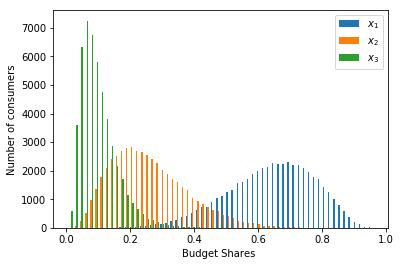

In [416]:
plt.hist(betas,bins=60,label = ['$x_1$', '$x_2$', '$x_3$'])
plt.legend()
plt.xlabel('Budget Shares ')
plt.ylabel('Number of consumers')

**Answer to question 2:**

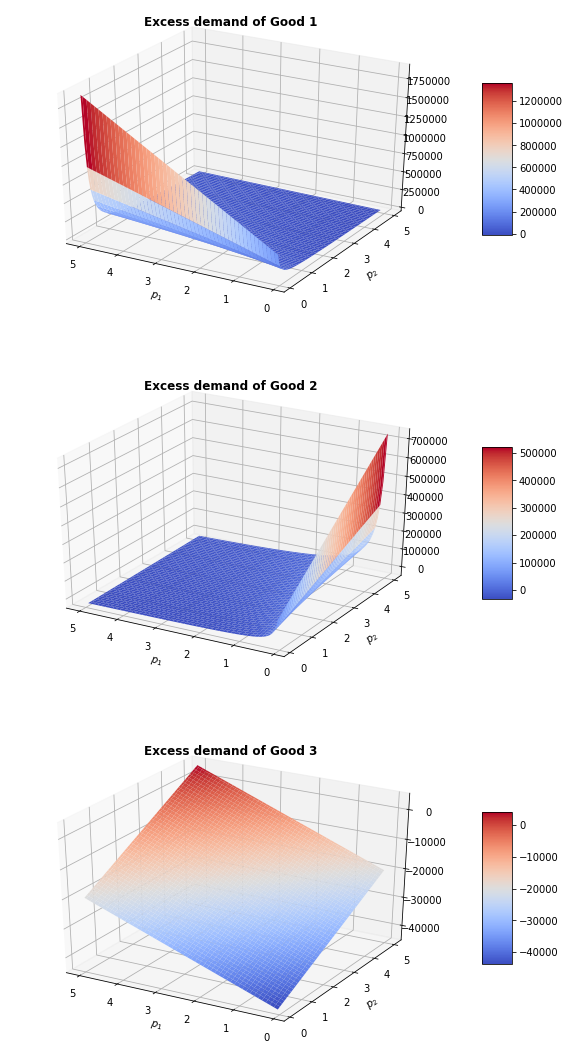

In [417]:
b1 = betas[:,0]
b2 = betas[:,1]
b3 = betas[:,2]

exam.demand_plots_3D(b1,b2,b3,e1,e2,e3)

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

In [421]:
p1 = 0.5
p2 = 0.5
kappa = 0.1
eps = 1e-8

walras_equil = exam.find_equilibrium(b1,b2,p1,p2,e1,e2,e3,eps,kappa,N)

print(f'The walras equilibrium is: (p1,p2)=({walras_equil[0]:.3f},{walras_equil[1]:.3f})')

  0: (p1,p2) = (0.55,0.50) -> (78511.72,1976.78)
  1: (p1,p2) = (0.60,0.50) -> (69457.67,3218.05)
  2: (p1,p2) = (0.64,0.51) -> (62819.88,4230.62)
  3: (p1,p2) = (0.68,0.51) -> (57686.84,5065.97)
  4: (p1,p2) = (0.71,0.51) -> (53567.97,5758.94)
   ...
5000: (p1,p2) = (6.37,2.57) -> (107.96,40.28)
10000: (p1,p2) = (6.48,2.61) -> (4.97,1.85)
15000: (p1,p2) = (6.49,2.62) -> (0.24,0.09)
20000: (p1,p2) = (6.49,2.62) -> (0.01,0.00)
25000: (p1,p2) = (6.49,2.62) -> (0.00,0.00)
The walras equilibrium is: (p1,p2)=(6.490,2.617)


**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Answers to question 4:**

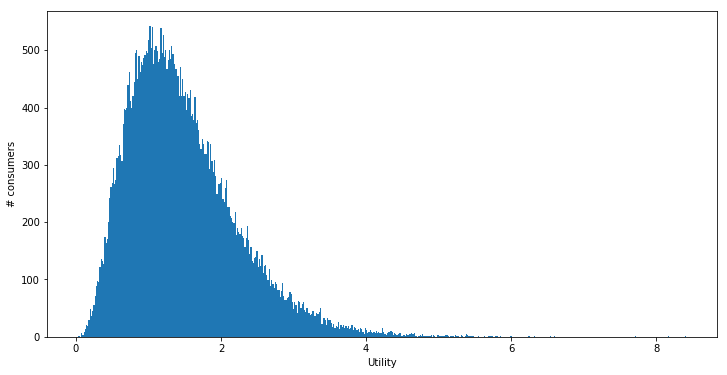

In [422]:
exam.utility_walras(p1,p2,e1,e2,e3,b1,b2,b3,gamma)

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

  0: (p1,p2) = (0.55,0.50) -> (78422.49,1545.01)
  1: (p1,p2) = (0.60,0.50) -> (69369.94,2808.32)
  2: (p1,p2) = (0.64,0.51) -> (62732.06,3843.17)
  3: (p1,p2) = (0.68,0.51) -> (57598.46,4700.46)
  4: (p1,p2) = (0.71,0.51) -> (53478.97,5414.65)
   ...
5000: (p1,p2) = (6.34,2.55) -> (105.91,39.30)
10000: (p1,p2) = (6.45,2.59) -> (4.79,1.78)
15000: (p1,p2) = (6.46,2.59) -> (0.22,0.08)
20000: (p1,p2) = (6.46,2.59) -> (0.01,0.00)
25000: (p1,p2) = (6.46,2.59) -> (0.00,0.00)
The walras equilibrium is with equal endowments: (p1,p2)=(6.456,2.589)


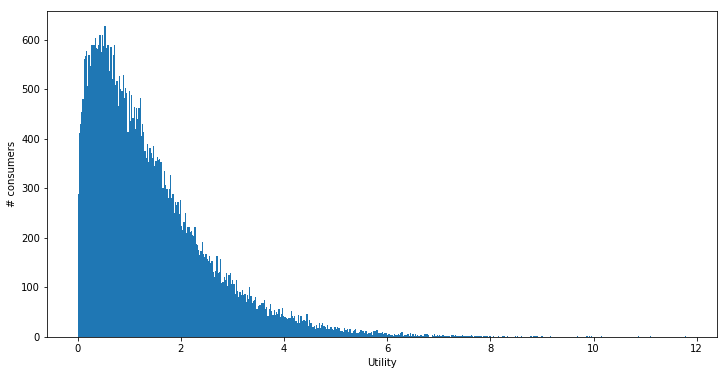

In [425]:
p1 = 0.5
p2 = 0.5
kappa = 0.1
eps = 1e-8

walras_equil = exam.find_equilibrium(b1,b2,p1,p2,e1,e1,e1,eps,kappa,N)

print(f'The walras equilibrium is with equal endowments: (p1,p2)=({walras_equil[0]:.3f},{walras_equil[1]:.3f})')

# Plot when all endowments are equal
exam.utility_walras(p1,p2,e1,e1,e1,b1,b2,b3,gamma)